# In this notebook, we will implement statistical tests to show that the compared distributions are distinct from one another.

## Note that this notebook requires arviz and pymc3.

In [19]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import scipy.stats as stats
import os, sys
import seaborn as sns
import pymc3 as pm
import matplotlib
import arviz as az
from matplotlib import gridspec
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from astropy.io import fits
from tqdm import tqdm_notebook as tqdm

sys.path.append('../')

## Loading in our table of results

In [2]:
results = pd.read_csv(os.path.split(os.getcwd())[0] + '/results/tables/Table1_seis.csv').dropna(subset=['mass'])
results

,KIC,numax,numax_std,Deltanu,Deltanu_err,DPi1,dpi_e,dpi_E,q,q_e,q_E,eps_g,eps_g_e,eps_g_E,drot,drot_e,drot_E,feh,mass,mass_std
0,1027337,74.587,1.492,6.953,0.002,70.243,0.065,0.045,0.077,0.016,0.022,-0.015,0.144,0.100,0.000,0.000,0.000,0.208,1.304,0.080
1,1430118,159.315,3.186,13.327,0.002,83.029,0.027,0.439,0.155,0.014,0.022,0.330,0.288,0.034,0.279,0.045,0.188,-0.158,1.051,0.057
2,1433803,150.604,3.012,12.166,0.002,80.221,0.010,0.268,0.138,0.019,0.016,0.039,0.109,0.022,0.399,0.174,0.442,0.263,1.231,0.070
3,1569842,135.204,2.704,11.818,0.003,80.708,0.144,0.079,0.155,0.018,0.017,0.195,0.134,0.105,0.366,0.027,0.030,-0.280,0.984,0.057
4,1719422,135.204,2.704,11.281,0.002,76.931,0.009,0.027,0.139,0.007,0.004,0.414,0.033,0.008,0.268,0.009,0.007,-0.282,1.282,0.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,12507577,82.611,1.652,7.492,0.002,70.504,0.025,0.042,0.147,0.005,0.012,0.138,0.073,0.060,0.482,0.005,0.004,0.214,1.332,0.080
1063,12554556,108.354,2.167,9.006,0.002,77.806,0.011,0.014,0.115,0.005,0.003,0.178,0.017,0.012,0.487,0.015,0.002,0.059,1.559,0.092
1064,12557207,84.797,1.696,8.084,0.003,74.263,0.064,0.043,0.111,0.035,0.038,0.100,0.040,0.167,0.000,0.000,0.000,-0.126,1.037,0.062
1065,12601771,178.448,3.569,14.461,0.003,85.046,0.040,0.095,0.160,0.002,0.016,0.237,0.067,0.033,0.352,0.044,0.003,-0.188,1.028,0.058


In [46]:
min(results.eps_g_e)

0.0

# Plotting Figure 13 in the paper.

/home/marc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/marc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/marc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
<ipython-input-6-fecb91efd7dc>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


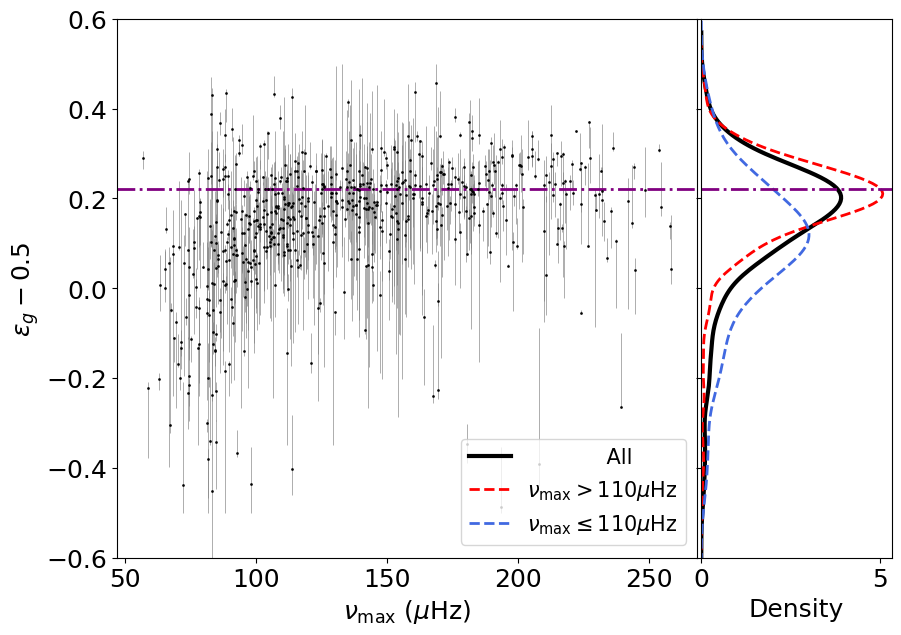

In [6]:
fig = plt.figure(figsize=(10,7))

fs = 18

gs = gridspec.GridSpec(1, 4,  wspace=0.022) # wspace=0.025, hspace=0.25
ax1 = fig.add_subplot(gs[:3])
ax2 = fig.add_subplot(gs[3])

ax1.errorbar(results.numax, 
                results.eps_g, yerr = [results.eps_g_e, results.eps_g_E], fmt='o', alpha=0.9,
                        c='k', lw=0.5, ecolor='gray', ms=1) 
ax1.set_xlabel('$\\nu_{\\mathrm{max}}$ ($\\mu$Hz)', fontsize=fs)
ax1.set_ylabel('$\\epsilon_{g} - 0.5$', fontsize=fs)
ax1.axhline(y=0.22, c='purple', ls='-.', lw=2)
ax1.set_ylim(-0.6, 0.6)

condz = results.numax <= 110


sns.kdeplot(results['eps_g'].values, ax=ax2,vertical=True, color='k', lw=3, label='            All')
sns.kdeplot(results[~condz].eps_g, ax=ax2,vertical=True, color='r', ls='--', lw=2
           , label='$\\nu_{\\mathrm{max}}> 110\\mu$Hz')
sns.kdeplot(results[condz].eps_g, ax=ax2,vertical=True,  color='royalblue', ls='--', lw=2, 
            label='$\\nu_{\\mathrm{max}}\\leq 110\\mu$Hz')

# results['eps_g'].plot.kde(color='gray', ax=ax2, vertical=True)

ax2.axhline(y=0.22, c='purple', ls='-.', lw=2)
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels([])
ax2.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=fs) 
ax2.tick_params(axis='both', which='major', labelsize=fs) 
ax2.legend(loc='lower right', prop={'size': fs-3},bbox_to_anchor=(-.025, 0.005))
ax2.set_xlabel('Density', fontsize=fs)


plt.tight_layout()
plt.show()
# plt.savefig('/home/marc/notebooks/sloscillations/sloscillations/paper/figures/fig_eg_hist.png', dpi=300,
#            bbox_inches='tight') 



# Here, we want to observe if there is a difference between the $\nu_{\mathrm{max}} > 110\mu$Hz and $\nu_{\mathrm{max}} \leq 110\mu$Hz distributions.

## First, we try a KS test. The p-value is far, far smaller than 0.01, which is the threshold we set (1%) to reject the null hypothesis.

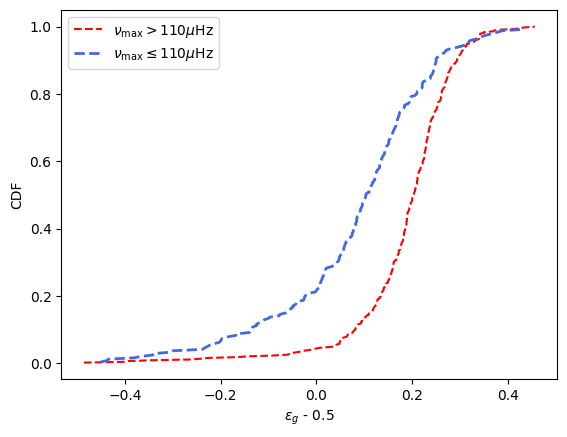

KstestResult(statistic=0.41598837209302325, pvalue=1.9753055209966762e-24)

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf_lowlum = ECDF(results[~condz].eps_g.values)
cdf_highlum = ECDF(results[condz].eps_g.values)

plt.plot(cdf_lowlum.x, cdf_lowlum.y, color='r', ls='--',
        label = '$\\nu_{\\mathrm{max}}> 110\\mu$Hz')
plt.plot(cdf_highlum.x, cdf_highlum.y,  color='royalblue', ls='--', lw=2, 
            label='$\\nu_{\\mathrm{max}}\\leq 110\\mu$Hz')
plt.legend()
plt.xlabel('$\\epsilon_g$ - 0.5')
plt.ylabel('CDF')
plt.show()

stats.ks_2samp(results[~condz].eps_g.values, results[condz].eps_g.values)

## A more informed way of quantifying these differences would be based on a Bayesian analysis as described in https://www.pymc.io/projects/docs/en/v3/pymc-examples/examples/case_studies/BEST.html

In [181]:
with pm.Model() as model:
    lowlum_mean = pm.Normal("lowlum_mean", mu=0.2, sigma=1)
    lowlum_sigma = results[~condz].eps_g_E.values+0.001 
    highlum_mean = pm.Normal("highlum_mean", mu=0.2, sigma=1)
    highlum_sigma =results[condz].eps_g_E.values+0.001 
    ν = pm.Exponential("ν", 1 / 29.0) + 1
    
    λ_lowlum = lowlum_sigma ** -2
    λ_highlum = highlum_sigma ** -2
    
    ## Define parameterized distributions
    lowlum_dist = pm.StudentT("lowlum_dist", nu=ν, mu=lowlum_mean, lam=λ_lowlum,
                              observed=results[~condz].eps_g.values)
    
    highlum_dist = pm.StudentT("highlum_dist", nu=ν, mu=highlum_mean, lam=λ_highlum, 
                               observed=results[condz].eps_g.values)
    
    diff_of_means = pm.Deterministic("difference of means", lowlum_mean - highlum_mean)


In [182]:
with model:
    trace = pm.sample(
    tune=15000,
    draws=2000,
    target_accept=0.99,
    chains=4,
    cores=4,
    init="advi+adapt_diag",
    n_init=50000,
    progressbar=True,
    return_inferencedata=True
)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 23100
Interrupted at 23,099 [46%]: Average Loss = 2,268.5
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, highlum_mean, lowlum_mean]


Sampling 4 chains for 15_000 tune and 2_000 draw iterations (60_000 + 8_000 draws total) took 51 seconds.


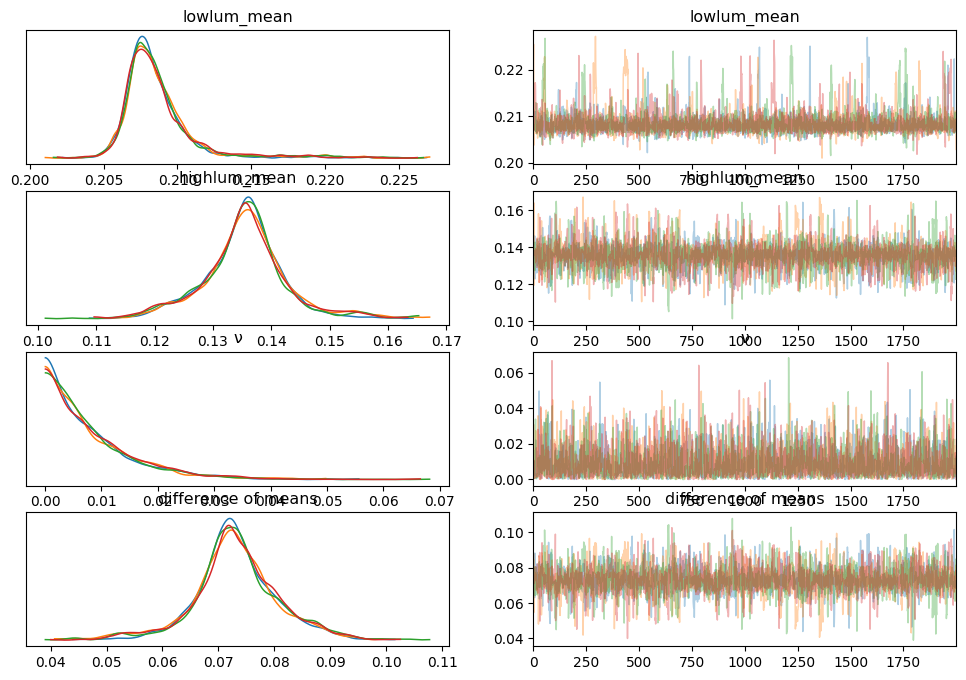

<xarray.Dataset>
Dimensions:              ()
Data variables:
    lowlum_mean          float64 1.001
    highlum_mean         float64 1.001
    ν                    float64 1.001
    difference of means  float64 1.001

In [183]:
_ = az.plot_trace(trace, compact=False)
plt.show()
az.rhat(trace)

## These summarize the mean and the sigma of each $\epsilon_g$ group 

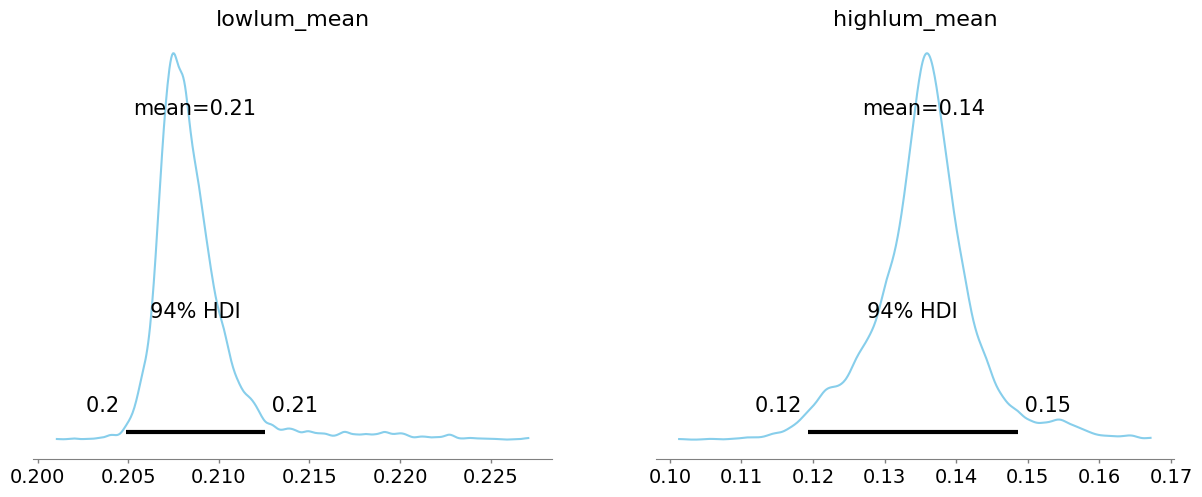

In [184]:
az.plot_posterior(
    trace,
    var_names=["lowlum_mean", "highlum_mean"],
    color="#87ceeb",
)
plt.show()

## The following shows that for the difference of means,  effectively 100% of the posterior probability is greater than zero, which very clearly indicates that the group means are credibly different.

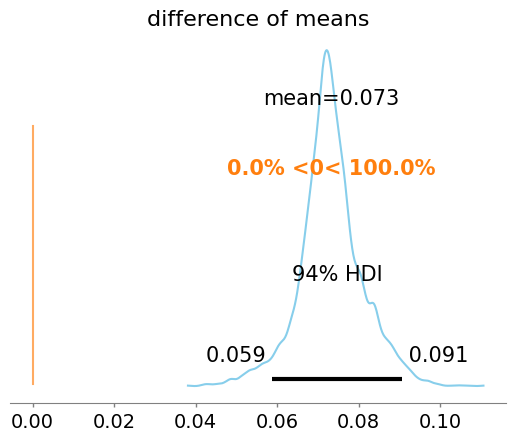

In [169]:
az.plot_posterior(
    trace,
    var_names=["difference of means"],
    ref_val=0,
    color="#87ceeb",
)
plt.show()

# Therefore we have shown using two methods (KS test and Bayesian) that the distribution of $\epsilon_g$ for stars with $\nu_{\mathrm{max}} \leq 110\mu$ Hz is statistically distinct from those with $\nu_{\mathrm{max}} > 110\mu$Hz.

# We now perform this analysis for rotational splitting, where we want to show that there exists a different in the measured splittings for stars with $\mathcal{N} \leq 7$ versus those with $\mathcal{N} > 7$.

In [83]:
results_rot = pd.read_csv(os.path.split(os.getcwd())[0] + '/results/tables/Table1_seis.csv')
results_rot = results_rot[results_rot.drot > 0]
results_rot['mm_density'] = (results_rot.Deltanu*1e-6)/(results_rot.DPi1*np.power(results_rot.numax*1e-6,2))

## Recreating Figure 13

/home/marc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/marc/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
<ipython-input-87-17807d89b38c>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


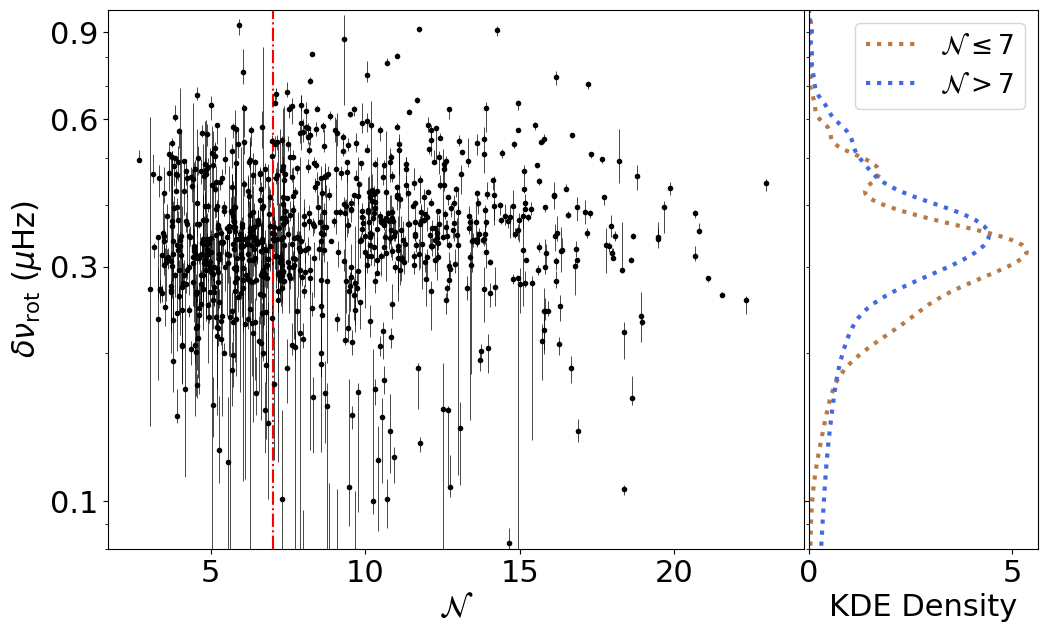

In [87]:
rbins = 10**np.linspace(np.log10(0.1), np.log10(1), 50)
sort_obs = np.argsort(results_rot.mm_density)

fs = 22
breakx = 7

fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(1, 4,  wspace=0.022) # wspace=0.025, hspace=0.25
ax1 = fig.add_subplot(gs[:3])
ax2 = fig.add_subplot(gs[3])


ax1.errorbar(results_rot.mm_density, results_rot.drot, c='k', yerr=[results_rot.drot_e, results_rot.drot_E], elinewidth=0.5, fmt='o', ms=3)
ax1.set_yscale('log')
ax1.set_ylim(0.08, 1)
ax1.set_ylabel('$\\delta\\nu_{\\mathrm{rot}}$ ($\\mu$Hz)', fontsize=fs)
ax1.set_xlabel('$\\mathcal{N}$', fontsize=fs)

ax1.tick_params(axis='both', which='major', labelsize=fs) 
ax2.tick_params(axis='both', which='major', labelsize=fs) 
ax1.axvline(x=7, ls='-.', c='r')

sns.kdeplot(results_rot.drot[results_rot.mm_density <= breakx], ax=ax2,vertical=True, color='#B97A46', ls=':', lw=3,
            label='$\\mathcal{N} \leq %d$' %breakx,
           bw_method=0.2)
sns.kdeplot(results_rot.drot[results_rot.mm_density > breakx], ax=ax2,vertical=True, color='royalblue', ls=':', lw=3,
            label='$\\mathcal{N} > %d$' %breakx,
           bw_method=0.2)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_yticks([0.1,  0.3, 0.6, 0.9])
ax2.legend(prop={'size': fs-3})
ax2.set_xlabel('KDE Density', fontsize=fs)
ax2.set_yscale('log')
ax2.set_ylim(ax1.set_ylim())
ax2.set_yticklabels([])
ax2.set_ylabel('')
plt.tight_layout()
plt.show()




## As before, we do a KS test. There seems to be a distinct difference between the distributions as indicated by p << 0.01.

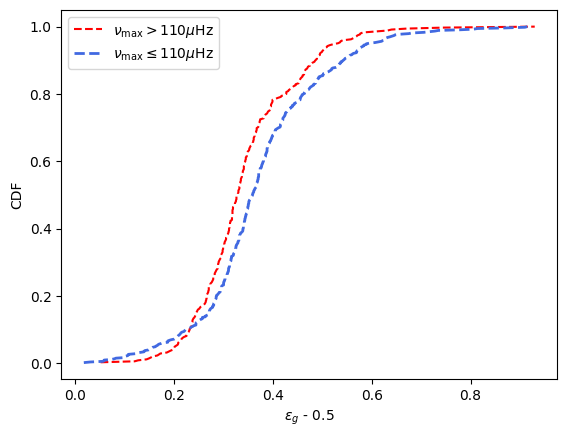

KstestResult(statistic=0.17391304347826086, pvalue=5.3973015113584915e-06)

In [89]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf_lowlum = ECDF(results_rot.drot[results_rot.mm_density <= breakx])
cdf_highlum = ECDF(results_rot.drot[results_rot.mm_density > breakx])

plt.plot(cdf_lowlum.x, cdf_lowlum.y, color='r', ls='--',
        label = '$\\nu_{\\mathrm{max}}> 110\\mu$Hz')
plt.plot(cdf_highlum.x, cdf_highlum.y,  color='royalblue', ls='--', lw=2, 
            label='$\\nu_{\\mathrm{max}}\\leq 110\\mu$Hz')
plt.legend()
plt.xlabel('$\\epsilon_g$ - 0.5')
plt.ylabel('CDF')
plt.show()

stats.ks_2samp(results_rot.drot[results_rot.mm_density <= breakx], 
               results_rot.drot[results_rot.mm_density > breakx])

## Performing a Bayesian analysis.

In [192]:
with pm.Model() as model:
    lowlum_mean = pm.Normal("lowlum_mean", mu=0.2, sigma=1)
#     lowlum_sigma_global = pm.HalfNormal("lowlum_sigma_global", sigma=5)

    lowlum_sigma_global = results_rot.drot_E[results_rot.mm_density <= breakx] + 0.001 #pm.HalfNormal("lowlum_sigma_global", sigma=5) # global sigma
    lowlum_ν_global = pm.Exponential("lowlum_ν_global", 1 / 29.0) + 1
    
    highlum_mean = pm.Normal("highlum_mean", mu=0.2, sigma=1)
#     highlum_sigma_global = pm.HalfNormal("highlum_sigma_global", sigma=5)

    highlum_sigma_global = results_rot.drot_E[results_rot.mm_density > breakx] + 0.001 #pm.HalfNormal("highlum_sigma_global", sigma=5)
    highlum_ν_global = pm.Exponential("highlum_ν_global", 1 / 29.0) + 1
    
    λ_lowlum = lowlum_sigma_global ** -2
    λ_highlum = highlum_sigma_global ** -2
    
    ## Define parameterized distributions
    lowlum_dist = pm.StudentT("lowlum_dist", nu=lowlum_ν_global, mu=lowlum_mean, lam=λ_lowlum,
                              observed=results_rot.drot[results_rot.mm_density <= breakx])
    
    highlum_dist = pm.StudentT("highlum_dist", nu=highlum_ν_global, mu=highlum_mean, lam=λ_highlum, 
                               observed=results_rot.drot[results_rot.mm_density > breakx])
    
    ## Define derived distributions
    diff_of_means = pm.Deterministic("difference of means", lowlum_mean - highlum_mean)


In [193]:
with model:
    trace = pm.sample(
    tune=15000,
    draws=2000,
    target_accept=0.99,
    chains=4,
    cores=4,
    init="advi+adapt_diag",
    n_init=50000,
    progressbar=True,
    return_inferencedata=True
)
    

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 21300
Interrupted at 21,299 [42%]: Average Loss = 4,904.4
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [highlum_ν_global, highlum_mean, lowlum_ν_global, lowlum_mean]


Sampling 4 chains for 15_000 tune and 2_000 draw iterations (60_000 + 8_000 draws total) took 52 seconds.


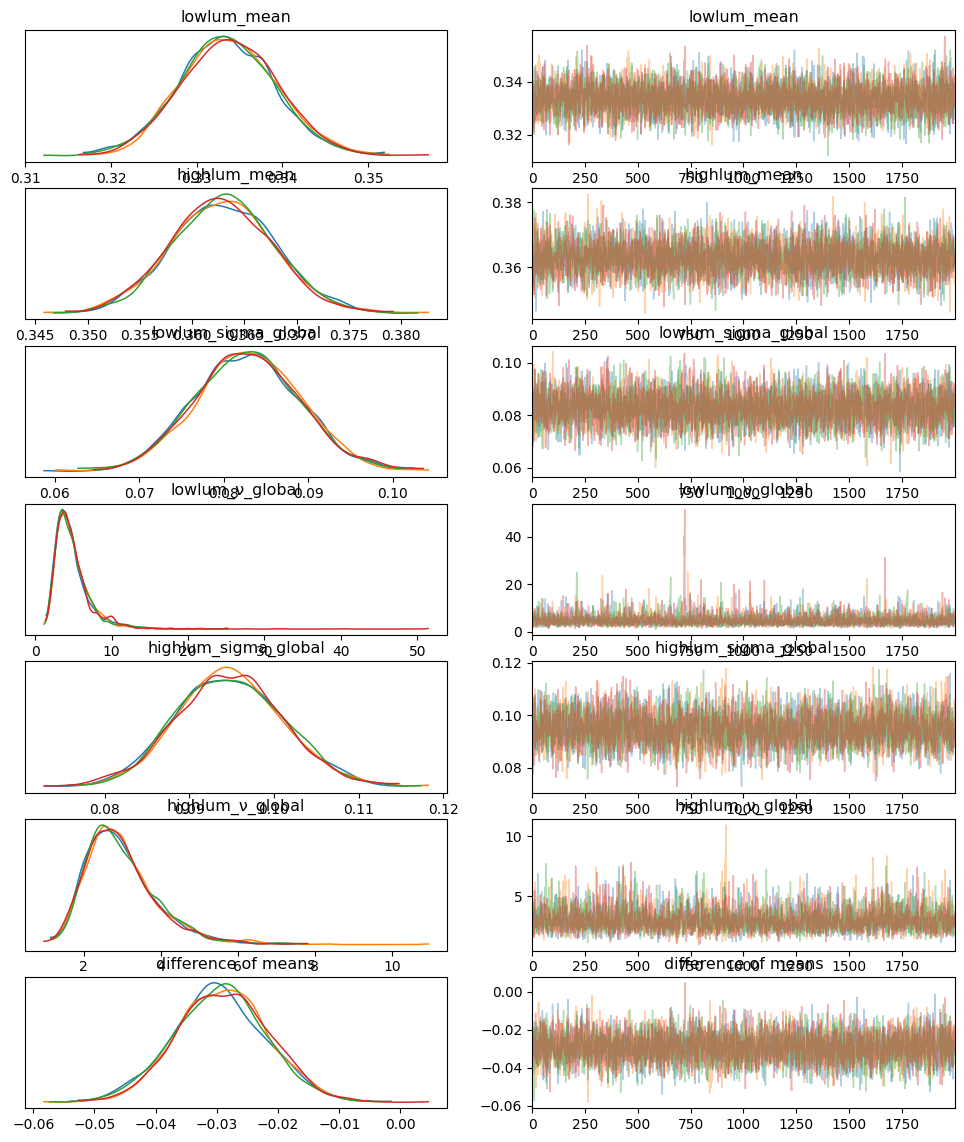

<xarray.Dataset>
Dimensions:               ()
Data variables:
    lowlum_mean           float64 1.001
    highlum_mean          float64 1.0
    lowlum_sigma_global   float64 1.0
    lowlum_ν_global       float64 1.001
    highlum_sigma_global  float64 1.0
    highlum_ν_global      float64 1.0
    difference of means   float64 1.001

In [189]:
_ = az.plot_trace(trace, compact=False)
plt.show()
az.rhat(trace)

## These summarize the mean and the sigma of each $\delta\nu_{\mathrm{rot}}$ group 

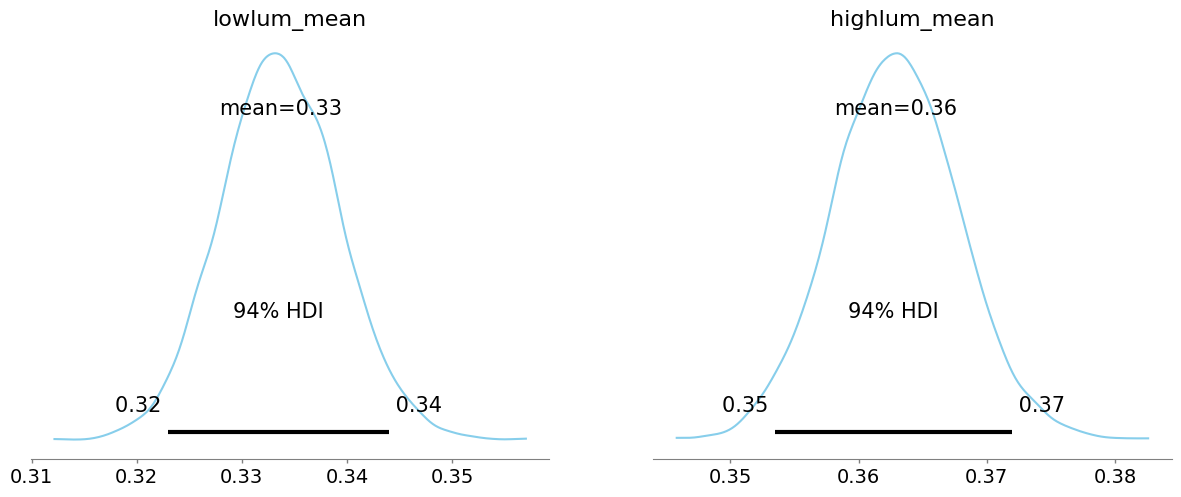

In [190]:
az.plot_posterior(
    trace,
    var_names=["lowlum_mean", "highlum_mean"],
    color="#87ceeb",
)
plt.show()

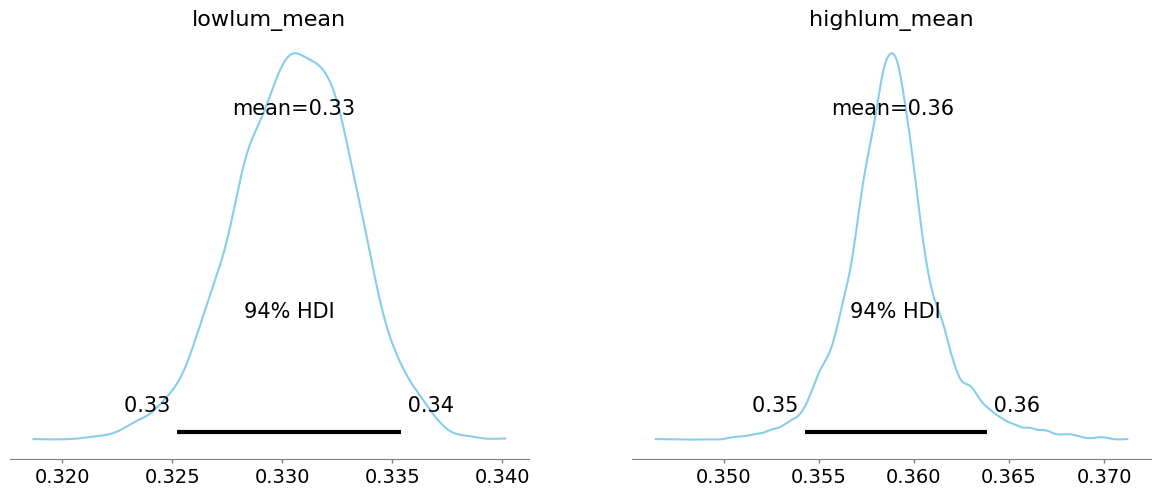

In [175]:
az.plot_posterior(
    trace,
    var_names=["lowlum_mean", "highlum_mean"],
    color="#87ceeb",
)
plt.show()

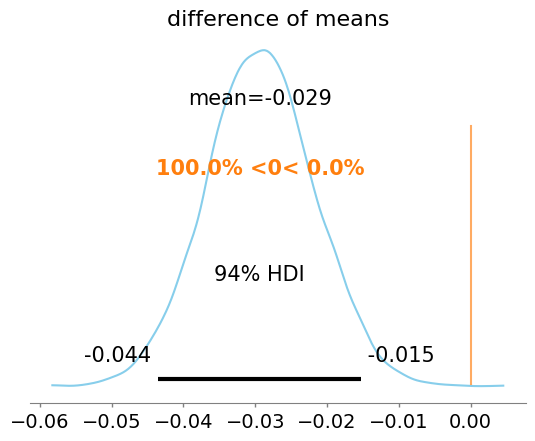

In [191]:
az.plot_posterior(
    trace,
    var_names=["difference of means"],
    ref_val=0,
    color="#87ceeb",
)
plt.show()

## The difference in means are credibly off from zero, which suggests that it is credible that there is indeed an offset in the group means.